#Libraries

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Example synthetic data for demonstration purposes
# Replace this with your actual feature extraction process
np.random.seed(0)
# 100 samples, 3 features (e.g., extracted from PPG)
x = np.random.rand(100, 3)
y = np.random.rand(100, 2)   # Corresponding blood pressure values (SBP, DBP)

# Convert to PyTorch tensors
x_tensor = torch.from_numpy(x)
y_tensor = torch.from_numpy(y)
print(x_tensor)
print(y_tensor)

tensor([[0.5488, 0.7152, 0.6028],
        [0.5449, 0.4237, 0.6459],
        [0.4376, 0.8918, 0.9637],
        [0.3834, 0.7917, 0.5289],
        [0.5680, 0.9256, 0.0710],
        [0.0871, 0.0202, 0.8326],
        [0.7782, 0.8700, 0.9786],
        [0.7992, 0.4615, 0.7805],
        [0.1183, 0.6399, 0.1434],
        [0.9447, 0.5218, 0.4147],
        [0.2646, 0.7742, 0.4562],
        [0.5684, 0.0188, 0.6176],
        [0.6121, 0.6169, 0.9437],
        [0.6818, 0.3595, 0.4370],
        [0.6976, 0.0602, 0.6668],
        [0.6706, 0.2104, 0.1289],
        [0.3154, 0.3637, 0.5702],
        [0.4386, 0.9884, 0.1020],
        [0.2089, 0.1613, 0.6531],
        [0.2533, 0.4663, 0.2444],
        [0.1590, 0.1104, 0.6563],
        [0.1382, 0.1966, 0.3687],
        [0.8210, 0.0971, 0.8379],
        [0.0961, 0.9765, 0.4687],
        [0.9768, 0.6048, 0.7393],
        [0.0392, 0.2828, 0.1202],
        [0.2961, 0.1187, 0.3180],
        [0.4143, 0.0641, 0.6925],
        [0.5666, 0.2654, 0.5232],
        [0.093

In [3]:
class ManualLinearRegression:
    def __init__(self, input_size):
        # Initialize weights and bias
        # Two outputs for SBP and DBP
        self.weights = torch.randn(input_size, 2, requires_grad=True)
        self.bias = torch.zeros(2, requires_grad=True)

    def forward(self, x):
        return x @ self.weights + self.bias  # Linear transformation

    def predict(self, x):
        with torch.no_grad():
            return self.forward(x)

    def compute_loss(self, y_pred, y_true):
        return torch.mean((y_pred - y_true) ** 2)  # Mean Squared Error

    def train(self, X_train, y_train, learning_rate=0.01, epochs=1000):
        optimizer = torch.optim.SGD(
            [self.weights, self.bias], lr=learning_rate)

        for epoch in range(epochs):
            optimizer.zero_grad()  # Zero gradients

            y_pred = self.forward(X_train)  # Forward pass
            loss = self.compute_loss(y_pred, y_train)  # Compute loss

            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights and bias

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss.item()}')

In [4]:
# Create an instance of the model and train it
model = ManualLinearRegression(input_size=x.shape[1])
model.train(x_tensor, y_tensor)

RuntimeError: expected m1 and m2 to have the same dtype, but got: double != float

Mean Absolute Error: 0.26246732473373413


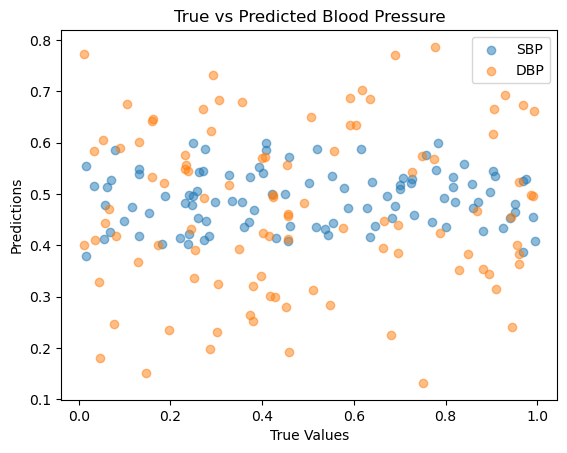

In [39]:
# Predictions on training data (or separate test data if available)
y_pred_tensor = model.predict(x_tensor)

# Convert predictions to NumPy for evaluation and plotting if needed
y_pred = y_pred_tensor.numpy()
y_true = y_tensor.numpy()

# Calculate metrics (e.g., Mean Absolute Error)
mae = np.mean(np.abs(y_pred - y_true))
print(f'Mean Absolute Error: {mae}')

# Optional: Plotting predictions vs actual values for visual evaluation
plt.scatter(y_true[:, 0], y_pred[:, 0], label='SBP', alpha=0.5)
plt.scatter(y_true[:, 1], y_pred[:, 1], label='DBP', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.title('True vs Predicted Blood Pressure')
plt.show()